In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [2]:
# Customize Plots
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10
sns.set_style('whitegrid')

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

In [3]:
inputs = pd.read_csv('inputs.csv',index_col=0)
df_Thermal = pd.read_csv('df_Thermal.csv',index_col=0)

- Train / Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputs.values,df_Thermal.values,test_size=0.2,random_state=101)

- Scale Data

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(36388, 37)

In [9]:
X_test.shape

(9097, 37)

- Create Neural Network

In [10]:
model = Sequential()

model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(20))


model.compile(optimizer='adam',loss='mse')

- Fit the Model

In [11]:
# - Hyperparameter Tunning:

batchsize = 128
epochs = 400

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [13]:
model.fit(x=X_train,
        y=y_train,
        validation_data=(X_test,y_test),
        batch_size=batchsize,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop])

Epoch 1/400
285/285 [==============================] - 2s 4ms/step - loss: 2135297280.0000 - val_loss: 1974963456.0000
Epoch 2/400
285/285 [==============================] - 1s 3ms/step - loss: 2075612416.0000 - val_loss: 1958836352.0000
Epoch 3/400
285/285 [==============================] - 1s 3ms/step - loss: 2050270720.0000 - val_loss: 1915571200.0000
Epoch 4/400
285/285 [==============================] - 1s 3ms/step - loss: 1987301120.0000 - val_loss: 1851385344.0000
Epoch 5/400
285/285 [==============================] - 1s 3ms/step - loss: 1944530432.0000 - val_loss: 1825633920.0000
Epoch 6/400
285/285 [==============================] - 1s 3ms/step - loss: 1922924288.0000 - val_loss: 1815724032.0000
Epoch 7/400
285/285 [==============================] - 1s 3ms/step - loss: 1917606400.0000 - val_loss: 1812666368.0000
Epoch 8/400
285/285 [==============================] - 1s 3ms/step - loss: 1914921344.0000 - val_loss: 1817019264.0000
Epoch 9/400
285/285 [===========================

In [14]:
losses = pd.DataFrame(model.history.history)

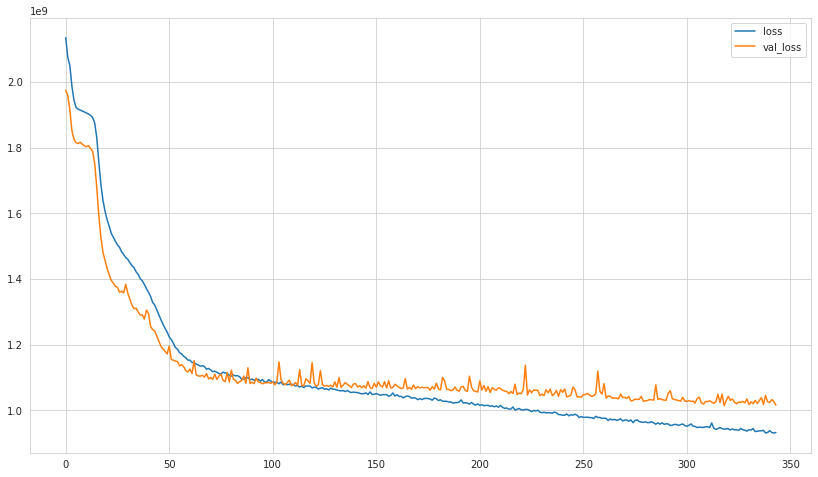

In [15]:
losses.plot()

### Evaluation Metrics

In [16]:
def eval_metrics_timeseries(real_values,pred,name='Variable'):
    print(f"""
        ------- {name} ------
        
MAE: {mean_absolute_error(real_values,pred):.3f},
MSE: {mean_squared_error(real_values,pred):.3f},
RMSE: {np.sqrt(mean_squared_error(real_values,pred)):.3f},
Explained Variance Score: {explained_variance_score(real_values,pred)*100:.3f}%,

Compare Mean values per Year: Predictions VS Real:

{pd.concat([pd.DataFrame(real_values).mean(),pd.DataFrame(pred).mean()],axis=1,keys=['Avg real',' Avg Pred'],names='Year')}
    """)

In [17]:
predictions_Thermal = model.predict(X_test)

285/285 [==============================] - 0s 1ms/step


In [18]:
eval_metrics_timeseries(y_test,predictions_Thermal,name='Extracted thermal Power (KJ/s)')


        ------- Extracted thermal Power (KJ/s) ------
        
MAE: 14477.133,
MSE: 1016301129.376,
RMSE: 31879.478,
Explained Variance Score: 48.744%,

Compare Mean values per Year: Predictions VS Real:

Year      Avg real      Avg Pred
0     15869.373551  15813.654297
1     13124.420794  13455.924805
2     12011.464328  12479.898438
3     11256.124639  11787.658203
4     10681.397884  11281.423828
5     10217.756699  10856.736328
6      9828.400484  10510.749023
7      9494.600307  10230.955078
8      9200.976046   9926.751953
9      8940.896700   9709.784180
10     8705.766134   9490.410156
11     8492.842743   9286.951172
12     8297.599446   9099.185547
13     8117.681475   8941.271484
14     7950.126238   8790.652344
15     7795.000547   8635.513672
16     7650.036376   8470.450195
17     7512.571181   8351.571289
18     7383.389226   8263.917969
19     7261.301960   8140.510254
    


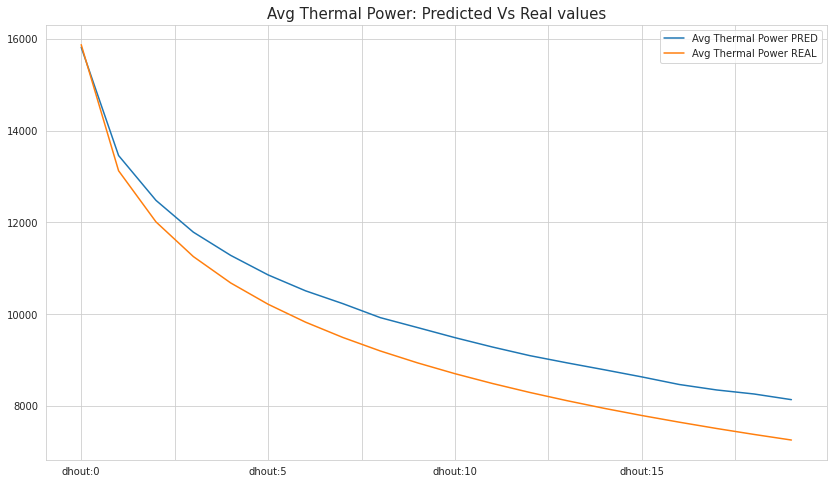

In [19]:
pd.DataFrame(predictions_Thermal,columns=df_Thermal.columns).mean().plot(legend=True,label='Avg Thermal Power PRED',
                                                                           title='Avg Thermal Power: Predicted Vs Real values')
pd.DataFrame(y_test,columns=df_Thermal.columns).mean().plot(legend=True,label='Avg Thermal Power REAL')

## REferences
### https://gdr.openei.org/search?pj%5B%5D=utah_forge&sort=pub_date_desc
### https://utahforge.com/